**DeepQMC tutorial**
---

**Background:**
---
  The electrons in a molecule are quantum mechanical in nature, meaning they do not follow classical physical laws. Quantum mechanics only gives a probability of where the electrons will be found and will not tell exactly where it can be found. This probability is given by the square of determinant of a property of molecule system called the wavefunction and is different in each case of different molecule.

The nucleus of the atoms in a molecule are considered to be stationary and then we solve to get the wavefunction. The probabilites when modelled into 3 dimensional space, takes the shape of the orbitals. Like shown in these images below which is taken via electron microscope.

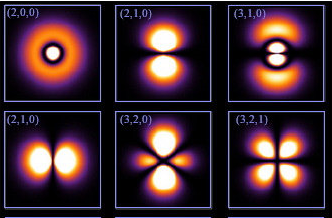
*(From the top left, oribtals in order - 2s, 2p(y),3p(y),2p(x),3d(z^2),3d(x^2-y^2))*


Don't worry if you cannot remember or relate to the concept of orbitals, just remember that these are the space where electrons are found with more probability.

Using these wavefunctions, the electronic structure(a model containing electrons at its most probable positions) of a system can be obtained which can be used to calculate the energy at ground state. This value, then can be used to calculate various properties like ionization energy, electron affinity, etc.

The wavefunction of simple one electron systems like hydrogen atom, helium cation can be found easily, but for heavier atoms and molecules, electron-electron repulsion and nucleus-nucleus repulsion comes into act and makes it hard to compute the wavefunctions due to these interactions. Calculating these wavefunctions exactly will need a lot of computing resources and time which cannot be feasible to get them. Hence, other various different techniques for to approximate the wavefunction have been introduced, where there is a different tradeoff between speed and accuracy of the solution. One such method is the variational Monte Carlo which aims to include the effects of electron correlation in the solution without it. 

Since Deep learning act as universal function approximators, it can be used to approximate wavefunction as well!! One such approach is the DNN based Variational Monte Carlo called [paulinet](https://arxiv.org/pdf/1909.08423.pdf). In this tutorial we will be looking into how to use Paulinet which is a part of an application called DeepQMC. 


# **Colab**
This tutorial and the rest in this sequence can be done in Google colab. If you'd like to open this notebook in colab, you can use the following link.


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/DeepQMC_tutorial.ipynb)


**Setup:**

First, we have download the DeepQMC application

In [ ]:
!pip install -U deepqmc[wf,train,cli]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 98 kB 5.6 MB/s 
     |████████████████████████████████| 96 kB 6.5 MB/s 
     |████████████████████████████████| 37.5 MB 1.1 MB/s 
  Created wheel for deepqmc: filename=deepqmc-0.3.1-py3-none-any.whl size=65279 sha256=39c71efd64d51f518b7a6e5d830590ce9825ba25dd056c32339bc77f058762a1
  Stored in directory: /root/.cache/pip/wheels/d7/4b/e0/591aae685c3c53756116cacf763dd230a46c63dac2cd55b9d6
Successfully built deepqmc
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This beh

# **The Hydrogen Molecule**
In this section, let us look at a simple molecule to compute for. That is the Hydrogen molecule (2 electrons and 2 nucleus containg each 1 proton) and let us try varying the inter-nuclear distance and its effect on the total energy.

Now, we create our own custom 'Molecule dataset',which is the format in which DeepQMC accepts the parameters of the molecule system. It shoud contain the list of coordinates of each nucleon in angstroms(coord), the list of number of protons in each nucleon(charges), the total ionic charge(charge) and the spin.

In [ ]:
from deepqmc import Molecule

mol = Molecule(  # H2
    coords=[[0,0,0],[0.7,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)

Now lets load the molecule and train as we did before. Here we have modified a particular set of parameters in training to get a solution with reasonable accuracy in short time.

In [ ]:
from deepqmc import train
from deepqmc.wf import PauliNet

net = PauliNet.from_hf(mol).cuda()
train(net,n_steps=1000,batch_size=1000,epoch_size=50)

converged SCF energy = -0.923689803780606


Reducing cusp-correction cutoffs due to overlaps


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

Now after training the model, we now will evaluate it, which means that the model will be run from first with the weights and biases of the neural network which one gets after the training.

In [ ]:
from deepqmc import evaluate
molecule=evaluate(net)

equilibrating: 0it [00:00, ?it/s]

Now lets do the same for a set of molecules with lesser inter-nuclear distance. 

In [ ]:
mol1 = Molecule(
    coords=[[0,0,0],[0.6,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)

mol2 = Molecule(
    coords=[[0,0,0],[0.5,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)

mol3 = Molecule(
    coords=[[0,0,0],[0.4,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)

In [ ]:
net1 = PauliNet.from_hf(mol1).cuda()
train(net1,n_steps=1000,batch_size=1000,epoch_size=50)

molecule1=evaluate(net1)

net2 = PauliNet.from_hf(mol2).cuda()
train(net2,n_steps=1000,batch_size=1000,epoch_size=50)

molecule2=evaluate(net2)

net3 = PauliNet.from_hf(mol3).cuda()
train(net3,n_steps=1000,batch_size=1000,epoch_size=50)

molecule3=evaluate(net3)

converged SCF energy = -0.723017701941079


Reducing cusp-correction cutoffs due to overlaps


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

equilibrating: 0it [00:00, ?it/s]

converged SCF energy = -0.477401854176405


Reducing cusp-correction cutoffs due to overlaps


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

equilibrating: 0it [00:00, ?it/s]

converged SCF energy = -0.0667788185795599


Reducing cusp-correction cutoffs due to overlaps


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

equilibrating: 0it [00:00, ?it/s]

Here we do the same but increase the inter-nuclear distance

In [ ]:
mol4 = Molecule(
    coords=[[0,0,0],[0.9,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)
mol5 = Molecule(
    coords=[[0,0,0],[1.1,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)
mol6 = Molecule(
    coords=[[0,0,0],[1.3,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)

mol7 = Molecule(
    coords=[[0,0,0],[1.5,0,0]],
    charges=[1,1],
    charge=0,
    spin=0,
)

In [ ]:
net4 = PauliNet.from_hf(mol4).cuda()
train(net4,n_steps=1000,batch_size=1000,epoch_size=50)

molecule4=evaluate(net4)

net5 = PauliNet.from_hf(mol5).cuda()
train(net5,n_steps=1000,batch_size=1000,epoch_size=50)

molecule5=evaluate(net5)

net6 = PauliNet.from_hf(mol6).cuda()
train(net6,n_steps=1000,batch_size=1000,epoch_size=50)

molecule6=evaluate(net6)

net7 = PauliNet.from_hf(mol7).cuda()
train(net7,n_steps=1000,batch_size=1000,epoch_size=50)

molecule7=evaluate(net7)

converged SCF energy = -0.975675679014309


Reducing cusp-correction cutoffs due to overlaps


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

equilibrating: 0it [00:00, ?it/s]

converged SCF energy = -1.0394846353994


Reducing cusp-correction cutoffs due to overlaps


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

equilibrating: 0it [00:00, ?it/s]

converged SCF energy = -1.08025155702238


Reducing cusp-correction cutoffs due to overlaps


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

equilibrating: 0it [00:00, ?it/s]

converged SCF energy = -0.984613550111649


equilibrating: 0it [00:00, ?it/s]

training:   0%|          | 0/1000 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/cuda/memory.py:274: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  FutureWarning)


sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

sampling:   0%|          | 0/25 [00:00<?, ?it/s]

equilibrating: 0it [00:00, ?it/s]

Let's plot the results and draw some conclusions from it. The results of the evaluation happens to be a dictionary with key "energy" and contains the values of the type uncertainities and hence uncertainities library has been used to deal with

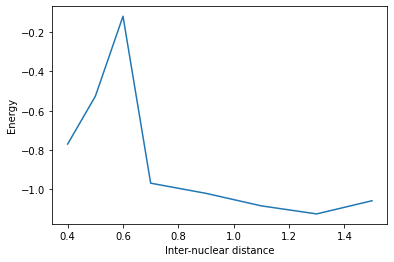

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from uncertainties import ufloat
import uncertainties

plt.ylabel("Energy")
plt.xlabel("Inter-nuclear distance")


xpoints = np.array([0.4,0.5,0.6,0.7,0.9,1.1,1.3,1.5])
ypoints = np.array([uncertainties.nominal_value(molecule1['energy']),uncertainties.nominal_value(molecule2['energy']),uncertainties.nominal_value(molecule3['energy']),uncertainties.nominal_value(molecule['energy']),uncertainties.nominal_value(molecule4['energy']),uncertainties.nominal_value(molecule5['energy']),uncertainties.nominal_value(molecule6['energy']),uncertainties.nominal_value(molecule7['energy'])])
#nominal value refers to the principal value excluding the error

plt.plot(xpoints, ypoints)
plt.show()

Here we examined the stability of different hypothetical molecule by differing the coordinates of the nucleus of a molecule. The one with lowest ground state energy is the most stable one. The inter-nuclear distance so lies between 1.2 and 1.4 as it has a visible minima there.

As you can see here, this result has a lot of applications!! If you calculate the ground state energy for the hydrogen molecule cation (H2+), then difference in their energy gives you the ionization energy, same can be done if you calculate the hyrogen moleculet anion to calculate the electron affinity, all from doing simulations!! Also, via this method, molecular electronic structure can also be determined, which can be used to examine various properties like conductivity, optical and chemical nature. So, this helps in finding better materials for specific applications.

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:

## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.

## Join the DeepChem Gitter
The DeepChem [Gitter](https://gitter.im/deepchem/Lobby) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!